In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=833cadee725aa5451ac2ef9dc5bab387279c791bb34832a65bfd1e672e3967d4
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("appName").getOrCreate()

In [ ]:
data = spark.read.csv('/content/Log.csv',inferSchema=True, header=True)

In [ ]:
data.show()

+---------+---+-------------+------+------------+-------------+
|  Country|Age|Vist Repeated|Server|viewed PAGES|User Category|
+---------+---+-------------+------+------------+-------------+
|    India| 41|            1| Yahoo|          21|            1|
|   Brazil| 28|            1| Yahoo|           5|            0|
|   Brazil| 40|            0|Google|           3|            0|
|Indonesia| 31|            1|  Bing|          15|            1|
| Malaysia| 32|            0|Google|          15|            1|
|   Brazil| 32|            0|Google|           3|            0|
|   Brazil| 32|            0|Google|           6|            0|
|Indonesia| 27|            0|Google|           9|            0|
|Indonesia| 32|            0| Yahoo|           2|            0|
|Indonesia| 31|            1|  Bing|          16|            1|
| Malaysia| 27|            1|Google|          21|            1|
|Indonesia| 29|            1| Yahoo|           9|            1|
|Indonesia| 33|            1| Yahoo|    

In [ ]:
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Vist Repeated: integer (nullable = true)
 |-- Server: string (nullable = true)
 |-- viewed PAGES: integer (nullable = true)
 |-- User Category: integer (nullable = true)



In [ ]:
data.columns

['Country', 'Age', 'Vist Repeated', 'Server', 'viewed PAGES', 'User Category']

In [ ]:
#Exploratory data analysis
data.describe().show()

+-------+--------+-----------------+-----------------+------+-----------------+------------------+
|summary| Country|              Age|    Vist Repeated|Server|     viewed PAGES|     User Category|
+-------+--------+-----------------+-----------------+------+-----------------+------------------+
|  count|   20000|            20000|            20000| 20000|            20000|             20000|
|   mean|    null|         28.53955|           0.5029|  null|           9.5533|               0.5|
| stddev|    null|7.888912950773227|0.500004090187782|  null|6.073903499824976|0.5000125004687693|
|    min|  Brazil|               17|                0|  Bing|                1|                 0|
|    max|Malaysia|              111|                1| Yahoo|               29|                 1|
+-------+--------+-----------------+-----------------+------+-----------------+------------------+



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
data.groupBy('Country').count().show()

+---------+-----+
|  Country|count|
+---------+-----+
| Malaysia| 1218|
|    India| 4018|
|Indonesia|12178|
|   Brazil| 2586|
+---------+-----+



In [ ]:
data.groupBy('Server').count().show()

+------+-----+
|Server|count|
+------+-----+
| Yahoo| 9859|
|  Bing| 4360|
|Google| 5781|
+------+-----+



In [ ]:
data.groupBy('Vist Repeated').count().show()

+-------------+-----+
|Vist Repeated|count|
+-------------+-----+
|            1|10058|
|            0| 9942|
+-------------+-----+



In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Server", outputCol = "Server No")
indexed = indexer.fit(data).transform(data)
indexed.head(7)

[Row(Country='India', Age=41, Vist Repeated=1, Server='Yahoo', viewed PAGES=21, User Category=1, Server No=0.0),
 Row(Country='Brazil', Age=28, Vist Repeated=1, Server='Yahoo', viewed PAGES=5, User Category=0, Server No=0.0),
 Row(Country='Brazil', Age=40, Vist Repeated=0, Server='Google', viewed PAGES=3, User Category=0, Server No=1.0),
 Row(Country='Indonesia', Age=31, Vist Repeated=1, Server='Bing', viewed PAGES=15, User Category=1, Server No=2.0),
 Row(Country='Malaysia', Age=32, Vist Repeated=0, Server='Google', viewed PAGES=15, User Category=1, Server No=1.0),
 Row(Country='Brazil', Age=32, Vist Repeated=0, Server='Google', viewed PAGES=3, User Category=0, Server No=1.0),
 Row(Country='Brazil', Age=32, Vist Repeated=0, Server='Google', viewed PAGES=6, User Category=0, Server No=1.0)]

In [ ]:
#Indexing
search_engine_indexer = StringIndexer(inputCol = "Server", outputCol = "Server Num")

In [ ]:
fit = search_engine_indexer.fit(data)
data = fit.transform(data)

In [ ]:
from pyspark.ml.feature import OneHotEncoder

In [ ]:
#one hot encoding
search_engine_encoder = OneHotEncoder(inputCol = "Server Num", outputCol = "Server Vector")
search_engine_encoder.setDropLast(False)
fit = search_engine_encoder.fit(data)
data = fit.transform(data)

In [ ]:
data.show(3,truncate = False)

+-------+---+-------------+------+------------+-------------+----------+-------------+
|Country|Age|Vist Repeated|Server|viewed PAGES|User Category|Server Num|Server Vector|
+-------+---+-------------+------+------------+-------------+----------+-------------+
|India  |41 |1            |Yahoo |21          |1            |0.0       |(3,[0],[1.0])|
|Brazil |28 |1            |Yahoo |5           |0            |0.0       |(3,[0],[1.0])|
|Brazil |40 |0            |Google|3           |0            |1.0       |(3,[1],[1.0])|
+-------+---+-------------+------+------------+-------------+----------+-------------+
only showing top 3 rows



In [ ]:
#original data
data.groupBy('Server').count().orderBy('count',ascending = False).show(5,False)

+------+-----+
|Server|count|
+------+-----+
|Yahoo |9859 |
|Google|5781 |
|Bing  |4360 |
+------+-----+



In [ ]:
#string indexer data
data.groupBy('Server Num').count().orderBy('count',ascending = False).show(5,False)

+----------+-----+
|Server Num|count|
+----------+-----+
|0.0       |9859 |
|1.0       |5781 |
|2.0       |4360 |
+----------+-----+



In [ ]:
#data converted to vector
data.groupBy('Server Vector').count().orderBy('count',ascending = False).show(5,False)

+-------------+-----+
|Server Vector|count|
+-------------+-----+
|(3,[0],[1.0])|9859 |
|(3,[1],[1.0])|5781 |
|(3,[2],[1.0])|4360 |
+-------------+-----+



Now we follow the same steps for another categorical column, "Country".

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Country", outputCol = "Country no")
indexed = indexer.fit(data).transform(data)
indexed.head(7)

[Row(Country='India', Age=41, Vist Repeated=1, Server='Yahoo', viewed PAGES=21, User Category=1, Server Num=0.0, Server Vector=SparseVector(3, {0: 1.0}), Country no=1.0),
 Row(Country='Brazil', Age=28, Vist Repeated=1, Server='Yahoo', viewed PAGES=5, User Category=0, Server Num=0.0, Server Vector=SparseVector(3, {0: 1.0}), Country no=2.0),
 Row(Country='Brazil', Age=40, Vist Repeated=0, Server='Google', viewed PAGES=3, User Category=0, Server Num=1.0, Server Vector=SparseVector(3, {1: 1.0}), Country no=2.0),
 Row(Country='Indonesia', Age=31, Vist Repeated=1, Server='Bing', viewed PAGES=15, User Category=1, Server Num=2.0, Server Vector=SparseVector(3, {2: 1.0}), Country no=0.0),
 Row(Country='Malaysia', Age=32, Vist Repeated=0, Server='Google', viewed PAGES=15, User Category=1, Server Num=1.0, Server Vector=SparseVector(3, {1: 1.0}), Country no=3.0),
 Row(Country='Brazil', Age=32, Vist Repeated=0, Server='Google', viewed PAGES=3, User Category=0, Server Num=1.0, Server Vector=SparseVec

In [ ]:
#Indexing
country_indexer = StringIndexer(inputCol = "Country", outputCol = "Country nu")

In [ ]:
fit = country_indexer.fit(data)
data = fit.transform(data)

In [ ]:
from pyspark.ml.feature import OneHotEncoder

In [ ]:
#one hot encoding
search_engine_encoder = OneHotEncoder(inputCol = "Country nu", outputCol = "Country_encode")
search_engine_encoder.setDropLast(False)
ohe = search_engine_encoder.fit(data)
data= ohe.transform(data)

In [ ]:
data.show(3,truncate = False)

+-------+---+-------------+------+------------+-------------+----------+-------------+----------+--------------+
|Country|Age|Vist Repeated|Server|viewed PAGES|User Category|Server Num|Server Vector|Country nu|Country_encode|
+-------+---+-------------+------+------------+-------------+----------+-------------+----------+--------------+
|India  |41 |1            |Yahoo |21          |1            |0.0       |(3,[0],[1.0])|1.0       |(4,[1],[1.0]) |
|Brazil |28 |1            |Yahoo |5           |0            |0.0       |(3,[0],[1.0])|2.0       |(4,[2],[1.0]) |
|Brazil |40 |0            |Google|3           |0            |1.0       |(3,[1],[1.0])|2.0       |(4,[2],[1.0]) |
+-------+---+-------------+------+------------+-------------+----------+-------------+----------+--------------+
only showing top 3 rows



In [ ]:
#original data
data.groupBy('Country').count().orderBy('count',ascending = False).show(10,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|12178|
|India    |4018 |
|Brazil   |2586 |
|Malaysia |1218 |
+---------+-----+



In [ ]:
data.groupBy('Country nu').count().orderBy('count',ascending = False).show(10,False)

+----------+-----+
|Country nu|count|
+----------+-----+
|0.0       |12178|
|1.0       |4018 |
|2.0       |2586 |
|3.0       |1218 |
+----------+-----+



In [ ]:
data.groupBy('Country_encode').count().orderBy('count',ascending = False).show(10,False)

+--------------+-----+
|Country_encode|count|
+--------------+-----+
|(4,[0],[1.0]) |12178|
|(4,[1],[1.0]) |4018 |
|(4,[2],[1.0]) |2586 |
|(4,[3],[1.0]) |1218 |
+--------------+-----+



In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
data_assembler = VectorAssembler(
    inputCols=['Server Vector','Country_encode','Age','Vist Repeated','viewed PAGES'],outputCol = "features")
data = data_assembler.transform(data)

In [ ]:
data.select(['features','User Category'])

DataFrame[features: vector, User Category: int]

In [ ]:
#select data for building model
model_data = data.select(['features','User Category'])

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
#split the data
training_data,test_data = model_data.randomSplit([0.80,0.20])

In [ ]:
training_data.count()

15982

In [ ]:
training_data.groupBy('User Category').count().show()

+-------------+-----+
|User Category|count|
+-------------+-----+
|            1| 7985|
|            0| 7997|
+-------------+-----+



In [ ]:
test_data.count()

4018

In [ ]:
test_data.groupBy('User Category').count().show()

+-------------+-----+
|User Category|count|
+-------------+-----+
|            1| 2015|
|            0| 2003|
+-------------+-----+



In [ ]:
log_reg = LogisticRegression(labelCol='User Category').fit(training_data)
#log_reg is object to store the results of Logistic Regression()

In [ ]:
#training results
train_results = log_reg.evaluate(training_data).predictions
#og_reg object has to call evaluate() to evaluate predictions by fitting the training data. 

In [ ]:
train_results.filter(train_results['User Category']==1).filter(train_results['prediction']==1).select(['User Category','prediction','probability']).show(10,False)

+-------------+----------+----------------------------------------+
|User Category|prediction|probability                             |
+-------------+----------+----------------------------------------+
|1            |1.0       |[0.4223894985489428,0.5776105014510572] |
|1            |1.0       |[0.4223894985489428,0.5776105014510572] |
|1            |1.0       |[0.2551036389060448,0.7448963610939552] |
|1            |1.0       |[0.2551036389060448,0.7448963610939552] |
|1            |1.0       |[0.2551036389060448,0.7448963610939552] |
|1            |1.0       |[0.1382170083410661,0.8617829916589339] |
|1            |1.0       |[0.1382170083410661,0.8617829916589339] |
|1            |1.0       |[0.06986390210272912,0.9301360978972709]|
|1            |1.0       |[0.06986390210272912,0.9301360978972709]|
|1            |1.0       |[0.06986390210272912,0.9301360978972709]|
+-------------+----------+----------------------------------------+
only showing top 10 rows



Probability at 0 index is for 0 class and probability as 1 index is for 1 class

In [ ]:
correct_preds = train_results.filter(train_results['User Category']==1).filter(train_results['prediction']==1).count()

In [ ]:
correct_preds

7491

In [ ]:
#Test set results
results = log_reg.evaluate(test_data).predictions

In [ ]:
results.select(['User Category','prediction']).show(20,False)

+-------------+----------+
|User Category|prediction|
+-------------+----------+
|0            |0.0       |
|1            |0.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
|1            |1.0       |
+-------------+----------+
only showing top 20 rows



In [ ]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- User Category: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
results[(results['User Category']==1) & (results.prediction ==1)].count()

1894

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
#CONFUSION MATRIX
true_positives = results[(results['User Category']==1)& (results.prediction==1)].count()
true_negatives = results[(results['User Category']==0)& (results.prediction==0)].count()
false_positives = results[(results['User Category']==0)& (results.prediction==1)].count()
false_negatives = results[(results['User Category']==1)& (results.prediction==0)].count()

In [ ]:
true_positives

1894

In [ ]:
true_negatives

1864

In [ ]:
false_positives

139

In [ ]:
false_negatives

121

In [ ]:
print(true_positives+true_negatives+false_negatives+false_positives)
print(results.count())

4018
4018


In [ ]:
#recall
recall = float(true_positives)/(true_positives+false_negatives)
recall

0.9399503722084367

In [ ]:
#precision
precision = float(true_positives)/(true_positives+false_positives)
precision

0.9316281357599606

In [ ]:
#accuracy
accuracy = float((true_positives+true_negatives)/(results.count()))
accuracy

0.9352911896465903

In [ ]:
import matplotlib.pyplot as plt

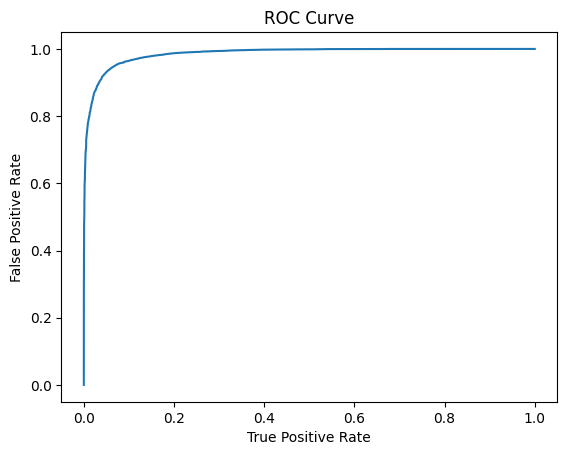

In [ ]:
#Reciever operating characteristic
trainsummary = log_reg.summary #summay of model results
roc = trainsummary.roc.toPandas()  #transform to pandas formats
plt.plot(roc['FPR'],roc['TPR'])  #plot the false positive rate, true positive rate
plt.ylabel('False Positive Rate')
plt.xlabel("True Positive Rate")
plt.title('ROC Curve')
plt.show()

In [ ]:
print('Training set area Under the curve (AUC): '+str(trainsummary.areaUnderROC))

Training set area Under the curve (AUC): 0.9857843372542101


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
test_val = BinaryClassificationEvaluator()
print('Test Area under ROC',test_val.evaluate(result))

NameError: ignored